In [2]:
import numpy as np
import pandas as pd

### `Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi'	'mumbai') as level-0 Index
* And Sort on row index level-0

In [3]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [4]:
# code here
df.reset_index().rename(columns={
    'level_0' : 'branch',
    'level_1' : 'year'
}).melt(id_vars=['branch', 'year'], var_name=['city', 'dk'], value_name='students').pivot(index=['city', 'year'],
                                                                                          columns=['branch', 'dk'],
                                                                                          values='students')

#df.reset_index()

branch              cse         ece      cse      ece
dk          avg_package avg_package students students
city   year                                          
delhi  2019           1           9        2       10
       2020           3          11        4       12
       2021           5          13        6       14
       2022           7          15        8       16
mumbai 2019           0           0        0        0
       2020           0           0        0        0
       2021           0           0        0        0
       2022           0           0        0        0

### `Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [5]:
confirm = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTmqT3kxd0i0RUFiEnwA1Hboiunv28MeNTatZsIEqlPPB7mHrl0ttJL7utZ23_1s5FW8ZjODmB8jHIi/pub?gid=2142019845&single=true&output=csv')

deaths = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQn4nLCKIVZMw4e89YeRqgKaSAAwRFaZ6ILMW_FUejZ2tkv3Np1f9gD4QOl3ASHeLzWjOjfmLDKcCOF/pub?gid=212966958&single=true&output=csv")

In [6]:
# code here
cf = confirm.melt(id_vars=confirm.columns[:4], var_name='date', value_name='cases')
dth = deaths.melt(id_vars=deaths.columns[:4], var_name='date', value_name='deaths')

ndf = cf.merge(dth, on=list(dth.columns[:5]))[['Province/State', 'Country/Region', 'date', 'deaths', 'cases']]

ndf= ndf.set_index(['Country/Region', 'Province/State']).sort_index()
ndf

date  deaths   cases
Country/Region Province/State                          
Afghanistan    NaN              1/22/20       0       0
               NaN              1/23/20       0       0
               NaN              1/24/20       0       0
               NaN              1/25/20       0       0
               NaN              1/26/20       0       0
...                                 ...     ...     ...
Zimbabwe       NaN             12/29/22    5637  259981
               NaN             12/30/22    5637  259981
               NaN             12/31/22    5637  259981
               NaN               1/1/23    5637  259981
               NaN               1/2/23    5637  259981

[311253 rows x 3 columns]

### `Q-3:` Show Country with Heighest death percent out of confirmed Cases. 

In [7]:
tdf = ndf.reset_index()[['Country/Region', 'deaths', 'cases']].pivot_table(index='Country/Region', aggfunc='sum')
tdf['death_percent'] = round((tdf['deaths'] / tdf['cases'])*100, 2)
tdf.sort_values('death_percent', ascending=False).head(1)

,cases,deaths,death_percent
Country/Region,,,
"Korea, North",234,1404,600.0


### `Q-4` : Make a dataframe for India from Covid Data with one extra column representing no of new cases. 

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 = 

Note:- Try using shift Function

Try using the shift function

```
s = pd.Series([1,2,3,4,5,6])
s #-> [1,2,3,4,5,6]
s.shift(1) #-> [NaN, 1,2,3,4,5]
s.shift(-1) #-> [2,3,4,5,6, NaN]
```

In [8]:
cf[cf['Country/Region'] == 'India'].tail(25)

,Province/State,Country/Region,Lat,Long,date,cases
304176,NaN,India,20.593684,78.96288,12/9/22,44675872
304465,NaN,India,20.593684,78.96288,12/10/22,44676045
304754,NaN,India,20.593684,78.96288,12/11/22,44676045
305043,NaN,India,20.593684,78.96288,12/12/22,44676318
305332,NaN,India,20.593684,78.96288,12/13/22,44676470
305621,NaN,India,20.593684,78.96288,12/14/22,44676670
305910,NaN,India,20.593684,78.96288,12/15/22,44676832
306199,NaN,India,20.593684,78.96288,12/16/22,44676999
306488,NaN,India,20.593684,78.96288,12/17/22,44677175
306777,NaN,India,20.593684,78.96288,12/18/22,44677310


In [12]:
# code here

rdf = ndf.loc['India'].reset_index().drop(columns=['Province/State'])

arr = rdf['cases'].shift(periods=1, fill_value=0)

rdf['daily_cases'] = rdf['cases'] - arr
rdf


,date,deaths,cases,daily_cases
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
...,...,...,...,...
1072,12/29/22,530699,44679382,243
1073,12/30/22,530702,44679608,226
1074,12/31/22,530705,44679873,265
1075,1/1/23,530707,44680046,173


### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town". 

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [14]:
# code here

df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               500 non-null    int64 
 1   Position                 500 non-null    int64 
 2   Country                  500 non-null    object
 3   City/Town                500 non-null    object
 4   Year                     500 non-null    int64 
 5   PM2.5                    500 non-null    int64 
 6   Temporal coverage        86 non-null     object
 7   PM10                     500 non-null    int64 
 8   Temporal coverage.1      52 non-null     object
 9   Database version (year)  500 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 39.2+ KB


In [24]:
df2 = df.drop(columns=['Unnamed: 0']).set_index(['Country', 'City/Town'])
df2

Position  Year  PM2.5 Temporal coverage  PM10  \
Country     City/Town                                                     
India       Kanpur               1  2016    173              >75%   319   
            Faridabad            2  2016    172              >75%   316   
            Gaya                 3  2016    149        50% -< 75%   275   
            Varanasi             4  2016    146              >75%   260   
            Patna                5  2016    144              >75%   266   
...                            ...   ...    ...               ...   ...   
Poland      Lublin             496  2016     27              >75%    31   
            Siedlce            497  2016     27              >75%    29   
            Trzebinia          498  2016     27              >75%    35   
El Salvador San Salvador       499  2016     27        50% -< 75%    59   
Turkey      Sivas              500  2016     27              >75%    56   

                         Temporal coverage.1  Database version (year)  
Country     City/Town                                                  
India       Kanpur                       NaN                     2018  
            Faridabad                    NaN                     2018  
            Gaya                         NaN                     2018  
            Varanasi                     NaN                     2018  
            Patna                        NaN                     2018  
...                                      ...                      ...  
Poland      Lublin                      >75%                     2018  
            Siedlce                     >75%                     2018  
            Trzebinia                   >75%                     2018  
El Salvador San Salvador                 NaN                     2018  
Turkey      Sivas                       >75%                     2018  

[500 rows x 7 columns]

In [27]:
# 1. Find out the name of the city of India which is most poluted based on PM10

df2.loc['India'].sort_values('PM10', ascending=False).head(1)

,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
City/Town,,,,,,,
Kanpur,1,2016,173,>75%,319,NaN,2018


In [28]:
# 2. Find out the name of the city of India which has minumum pollution level based on PM10

df2.loc['India'].sort_values('PM10', ascending=True).head(1)

,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
City/Town,,,,,,,
Aizawl,484,2016,27,NaN,44,NaN,2018


In [30]:
# 3. Do same operations (like 1 and 2) with the country China.

print(df2.loc['China'].sort_values('PM10', ascending=False).head(1), end='\n\n')
print(df2.loc['China'].sort_values('PM10', ascending=True).head(1))

           Position  Year  PM2.5 Temporal coverage  PM10 Temporal coverage.1  \
City/Town                                                                      
Jinan            22  2014     90               NaN   192                 NaN   

           Database version (year)  
City/Town                           
Jinan                         2018  

           Position  Year  PM2.5 Temporal coverage  PM10 Temporal coverage.1  \
City/Town                                                                      
Anshun          477  2016     27               NaN    38                 NaN   

           Database version (year)  
City/Town                           
Anshun                        2018  


<Axes: ylabel='PM10'>

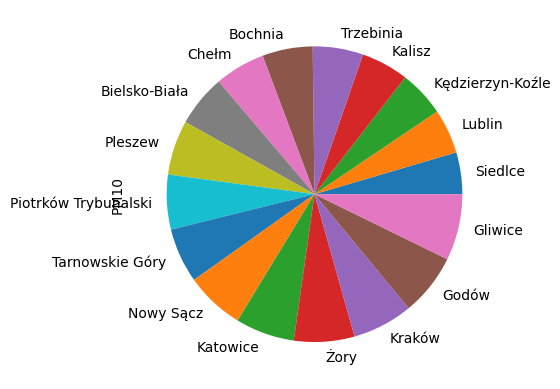

In [33]:
# 4. Make a pie chart based on the column "PM10" of the country Poland.

df2.loc['Poland']['PM10'].sort_values().plot(kind='pie')

In [34]:
# 6. Convert this MultiIndex DataFrame to Series by retaining the informations.

df2.stack()

Country  City/Town                         
India    Kanpur     Position                      1
                    Year                       2016
                    PM2.5                       173
                    Temporal coverage          >75%
                    PM10                        319
                                               ... 
Turkey   Sivas      PM2.5                        27
                    Temporal coverage          >75%
                    PM10                         56
                    Temporal coverage.1        >75%
                    Database version (year)    2018
Length: 2638, dtype: object